In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time



In [5]:
# Generate synthetic data with a better distribution
np.random.seed(42)
num_samples = 100
X = np.random.uniform(-2, 2, (num_samples, 2))  # Expand range to (-2, 2)

# Corrected target function: -2 + x1 + 2*x2 > 0
y = np.where(-2 + X[:, 0] + 2 * X[:, 1] > 0, 1, -1)  # Correct label assignment

# Add bias term (w0*x0 where x0=1)
X = np.hstack((np.ones((num_samples, 1)), X))  # Shape: (num_samples, 3)



In [ ]:
# Initialize weights randomly
def initialize_weights():
    return np.random.randn(3)

# Delta rule update
def delta_rule_update(w, X_sample, y_sample, eta):
    prediction = np.dot(w, X_sample)
    error = y_sample - prediction
    w += eta * error * X_sample  # Weight update
    return w, error**2  # Return new weights and squared error

# Train perceptron using different learning strategies
def train_perceptron(X, y, eta_strategy="constant", eta_0=0.1, max_iters=100, batch=False):
    w = initialize_weights()
    errors = []
    exec_time = time.time()
    
    for i in range(1, max_iters + 1):
        total_error = 0
        
        if eta_strategy == "constant":
            eta = eta_0
        elif eta_strategy == "decaying":
            eta = eta_0 / i  # Decaying learning rate
        
        if batch:
            # Compute batch gradient
            predictions = np.dot(X, w)
            errors_vec = y - predictions
            w += eta * np.dot(errors_vec, X) / len(X)
            total_error = np.mean(errors_vec ** 2)
        else:
            # Incremental update (stochastic gradient descent)
            for j in range(len(X)):
                w, e = delta_rule_update(w, X[j], y[j], eta)
                total_error += e
            
            total_error /= len(X)

        errors.append(total_error)
    
    exec_time = time.time() - exec_time
    return w, errors, exec_time

# Compare constant vs. decaying learning rates
def compare_learning_rates():
    iterations = [5, 10, 50, 100]
    
    plt.figure(figsize=(10, 5))
    
    for eta_strategy in ["constant", "decaying"]:
        w, errors, _ = train_perceptron(X, y, eta_strategy=eta_strategy, eta_0=0.1, max_iters=100, batch=False)
        plt.plot(errors, label=f"{eta_strategy} learning rate")
    
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title("Error over iterations for different learning rate strategies")
    plt.legend()
    plt.show()

# Compare incremental vs. batch learning
def compare_learning_methods():
    _, inc_errors, inc_time = train_perceptron(X, y, eta_strategy="constant", eta_0=0.1, max_iters=100, batch=False)
    _, batch_errors, batch_time = train_perceptron(X, y, eta_strategy="constant", eta_0=0.1, max_iters=100, batch=True)
    
    plt.figure(figsize=(10, 5))
    plt.plot(inc_errors, label=f"Incremental (Time: {inc_time:.2f}s)")
    plt.plot(batch_errors, label=f"Batch (Time: {batch_time:.2f}s)")
    
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title("Incremental vs. Batch Learning")
    plt.legend()
    plt.show()

# Compare decision boundaries at different iterations
def plot_decision_boundaries():
    iterations = [5, 10, 50, 100]
    
    plt.figure(figsize=(12, 8))
    
    for i, iters in enumerate(iterations):
        w, _, _ = train_perceptron(X, y, eta_strategy="constant", eta_0=0.1, max_iters=iters, batch=False)
        
        plt.subplot(2, 2, i + 1)
        plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', alpha=0.5)
        
        # Plot decision boundary: w0 + w1*x1 + w2*x2 = 0 → x2 = (-w0 - w1*x1) / w2
        x1_range = np.linspace(-1, 1, 100)
        x2_range = (-w[0] - w[1] * x1_range) / w[2]
        
        plt.plot(x1_range, x2_range, 'k', label=f"{iters} iterations")
        plt.title(f"Decision boundary after {iters} iterations")
        plt.legend()
    
    plt.tight_layout()
    plt.show()



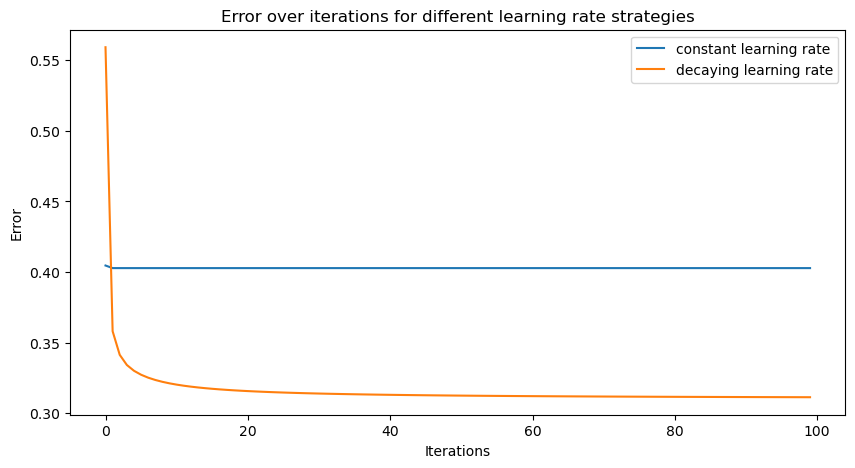

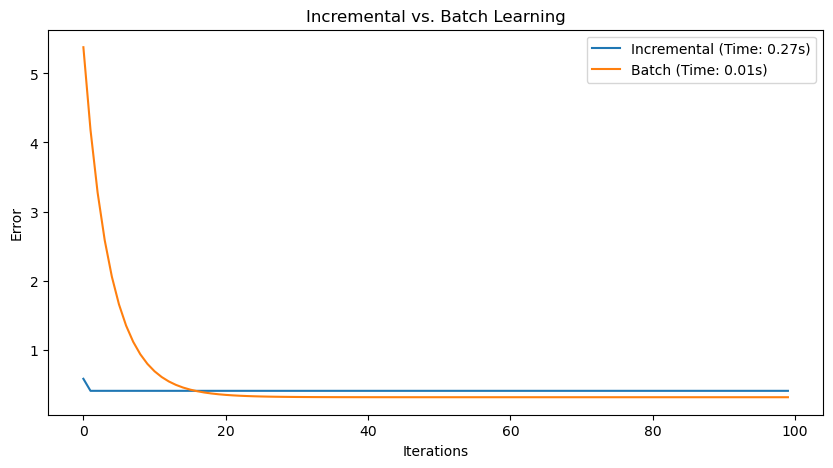

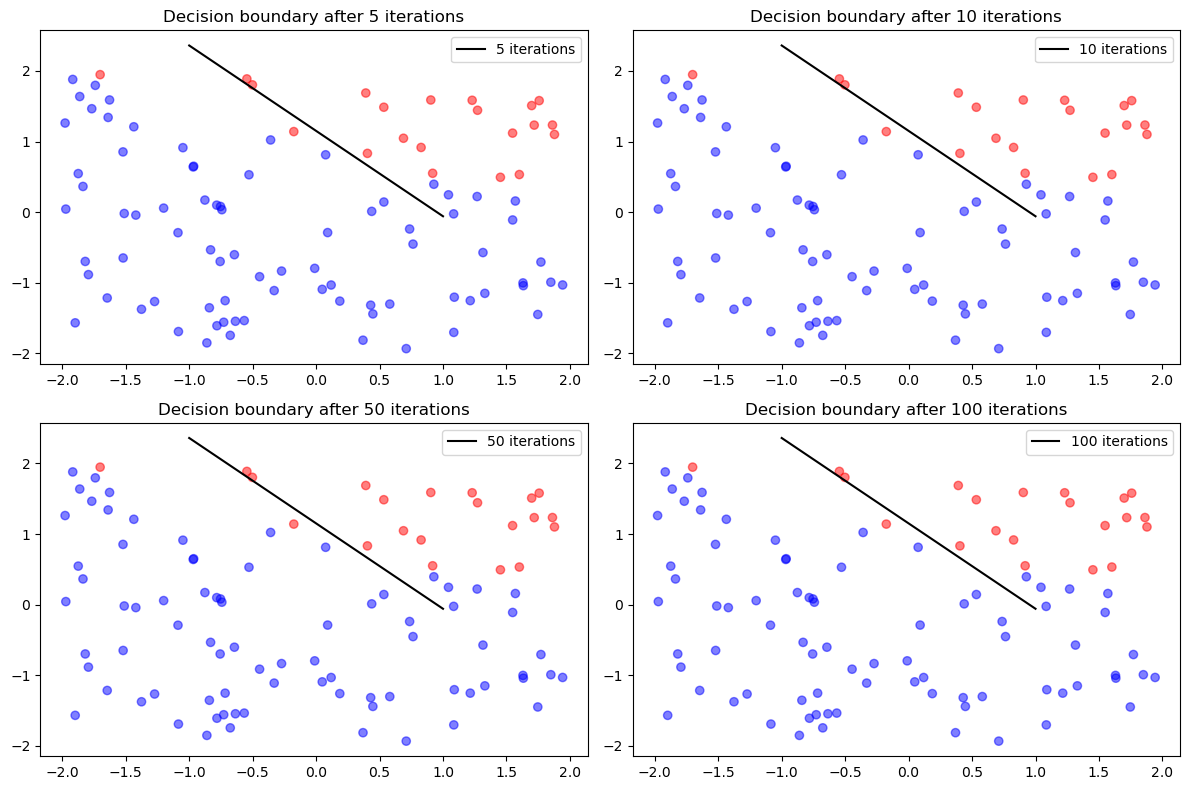

In [7]:
# Run all comparisons
compare_learning_rates()
compare_learning_methods()
plot_decision_boundaries()
